In [1]:
import random as rand
import pandas as pd
import re
import emoji
import html
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [2]:
rand.seed(0)

In [3]:
#training_df = pd.read_csv("/home/tdurkin/Desktop/translated.csv")

In [4]:
training_df = pd.read_csv("/home/tdurkin/Desktop/training_data_new.csv")
training_df

/tmp/ipykernel_35391/590613287.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  training_df = pd.read_csv("/home/tdurkin/Desktop/training_data_new.csv")


,Unnamed: 0,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,all_english_text,expanded_urls
0,0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,False,True,WuhanCoronaVirus KillerCuomo,us,Remember the #WuhanCoronaVirus? The pandemic w...,NaN
1,1,My sources @WhiteHouse say 2 tactics will be u...,NaN,False,True,Trump,us,My sources @WhiteHouse say 2 tactics will be u...,NaN
2,2,I'll venture a wild guess: If you were running...,NaN,False,True,COVID19,us,I'll venture a wild guess: If you were running...,https://www.science.org/content/article/new-wh...
3,3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,False,True,Pakistan GreenStimulus Nature Green,us,#Pakistan (#GreenStimulus = #Nature protection...,https://news.trust.org/item/20200717070925-r4m...
4,4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,False,True,coronavirus COVID__19 COVIDー19,us,🇺🇸 Pandemic of #Coronavirus: 30 American pasto...,NaN
...,...,...,...,...,...,...,...,...,...
239995,239995,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN,True,True,Mastеr,new_zealand,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN
239996,239996,Very interesting\nAny thoughts?\n\n#TheFive #T...,NaN,False,True,TheFive Trump2020 KAG2020 mondaythoughts COVID...,new_zealand,Very interesting\nAny thoughts?\n\n#TheFive #T...,https://twitter.com/Franck2Ausa/status/1287847...
239997,239997,As we deal with #COVID19 don't forget that #Ch...,NaN,True,True,COVID19 Christians persecution Nigeria,new_zealand,As we deal with #COVID19 don't forget that #Ch...,https://twitter.com/psjuk_official/status/1253...
239998,239998,"While we hit 150,000 in #COVID19 deaths, the P...",NaN,False,True,COVID19,new_zealand,"While we hit 150,000 in #COVID19 deaths, the P...",NaN


In [5]:
training_df['expanded_urls'] = training_df['expanded_urls'].fillna("")
training_df['expanded_urls'] = training_df['expanded_urls'].apply(lambda x: x.strip(" "))

In [6]:
training_df[:10]

,Unnamed: 0,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,all_english_text,expanded_urls
0,0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,False,True,WuhanCoronaVirus KillerCuomo,us,Remember the #WuhanCoronaVirus? The pandemic w...,
1,1,My sources @WhiteHouse say 2 tactics will be u...,NaN,False,True,Trump,us,My sources @WhiteHouse say 2 tactics will be u...,
2,2,I'll venture a wild guess: If you were running...,NaN,False,True,COVID19,us,I'll venture a wild guess: If you were running...,https://www.science.org/content/article/new-wh...
3,3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,False,True,Pakistan GreenStimulus Nature Green,us,#Pakistan (#GreenStimulus = #Nature protection...,https://news.trust.org/item/20200717070925-r4m9m/
4,4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,False,True,coronavirus COVID__19 COVIDー19,us,🇺🇸 Pandemic of #Coronavirus: 30 American pasto...,
5,5,So I made a meme....#corona #virus #meme #coro...,NaN,False,True,corona virus meme coronavirusmeme toilet paper...,us,I know the made a meme .... #crown #virus #mem...,https://twitter.com/reyna4321/status/123850627...
6,6,When I first saw the revised CDC figure—which ...,NaN,False,True,Coronavirus,us,When I first saw the revised CDC figure—which ...,
7,7,"Um, no one’s really listening to you. #blackli...",NaN,True,False,blacklifematters COVID19 StopPoliceBrutality,us,"Um, no one’s really listening to you. #blackli...",
8,8,ஆக்கப்பூர்வமான யோசனையை @CMOTamilNadu அரசுக்கு ...,NaN,False,True,corona,us,The DMK @CMotamilnadu told the government @ari...,https://twitter.com/iparanthamen/status/128767...
9,9,The Academy Might Be Postponing The Oscars\n\n...,NaN,False,False,TheAcademy AcademyAwards Oscars TheOscars AMPA...,us,The Academy Might Be Postponing The Oscars\n\n...,https://www.hollywoodnews.com/2020/05/19/the-a...


In [7]:
training_df.groupby('country')['is_retweet'].value_counts()

country      is_retweet
australia    TRUE          19713
             FALSE          9215
             True           7540
             False          3532
canada       True          25947
             False         14053
ireland      TRUE          25148
             FALSE         11459
             True           2304
             False          1088
             ireland           1
new_zealand  True          27658
             False         12342
uk           True          25743
             False         14257
us           True          27837
             False         12163
Name: is_retweet, dtype: int64

In [8]:
hashtags_df = pd.DataFrame(training_df.hashtags.str.split(' ').tolist(),
						index = training_df.country).stack()
hashtags_df = hashtags_df.reset_index([0, 'country'])
hashtags_df.columns = ['Country', 'Hashtag']

hashtags_df[:10]

,Country,Hashtag
0,us,WuhanCoronaVirus
1,us,KillerCuomo
2,us,Trump
3,us,COVID19
4,us,Pakistan
5,us,GreenStimulus
6,us,Nature
7,us,Green
8,us,coronavirus
9,us,COVID__19


In [9]:
topTenHashtags = hashtags_df['Hashtag'].value_counts()[:10].index
topTenHashtags

Index(['COVID19', 'coronavirus', 'Covid19', 'covid19', 'COVID', 'Coronavirus',
       'Covid_19', 'COVIDー19', 'Covid', 'StaySafe'],
      dtype='object')

In [10]:
countryValues = pd.crosstab(index = hashtags_df['Country'], columns = hashtags_df['Hashtag'])
countryValues

Hashtag,02JUL20,0613FM_0509,06strong,1-Jun,10-Jul,10-Jun,1000families,1000islands,1000lives,1000names,...,𝐛𝐫𝐞𝐚𝐭𝐡𝐞,𝐟𝐚𝐜𝐞𝐦𝐚𝐬𝐤𝐬,𝐟𝐚𝐜𝐞𝐬𝐡𝐢𝐞𝐥𝐝𝐬,𝐟𝐚𝐢𝐧𝐭,𝐨𝐱𝐲𝐠𝐞𝐧,𝑁𝑎𝑡𝑖𝑜𝑛𝑠𝑈𝑛𝑖𝑡𝑒𝑑,𝒟𝒾𝑒𝒷𝒪37,𝔊𝕯𝔏𝔈,𝗠𝗬𝗠,𝗦𝗢𝗟𝗗
Country,,,,,,,,,,,,,,,,,,,,,
australia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
canada,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
ireland,0,0,0,0,0,0,0,0,0,0,...,1,2,1,1,1,1,0,0,0,0
new_zealand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
uk,0,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,1,2,0,0
us,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
countryTopTenValues = countryValues[topTenHashtags]
countryTopTenValues

Hashtag,COVID19,coronavirus,Covid19,covid19,COVID,Coronavirus,Covid_19,COVIDー19,Covid,StaySafe
Country,,,,,,,,,,
australia,15268,4072,1522,2025,1575,987,1060,819,480,341
canada,15940,4172,1916,1629,1190,1174,1041,895,558,447
ireland,14535,3666,3812,1537,896,861,1386,959,705,1168
new_zealand,16680,3571,2303,1493,1764,1044,1158,1078,599,331
uk,13734,5292,2036,1454,1279,1375,1127,949,654,603
us,17054,4890,1053,1170,1795,1433,853,890,498,210


/home/tdurkin/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


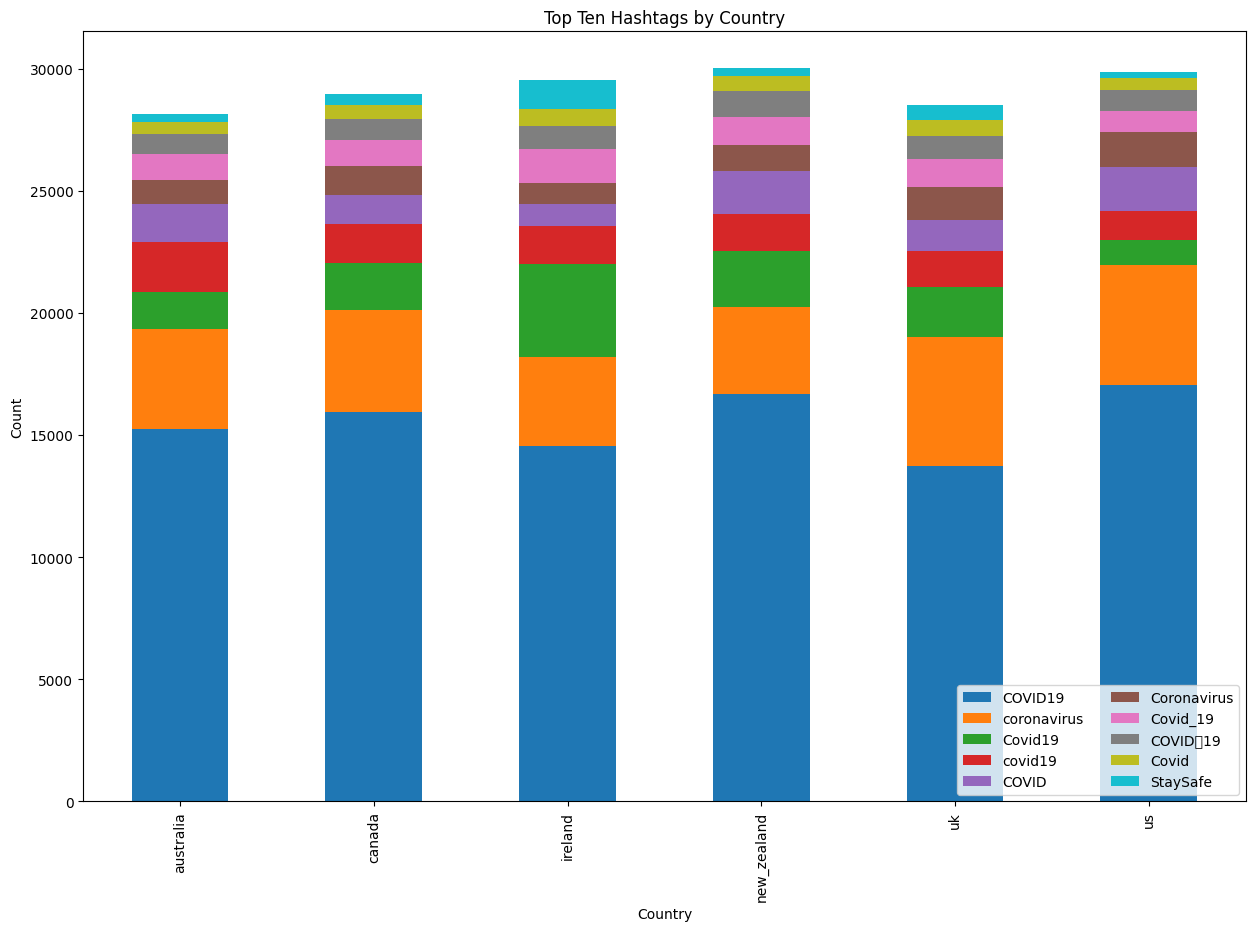

In [12]:
countryTopTenValues.plot(kind = 'bar', 
						 stacked = True,
						 figsize = (15,10))

plt.legend(loc="lower right", ncol=2)
plt.ylabel("Count")
plt.title("Top Ten Hashtags by Country")
plt.show()

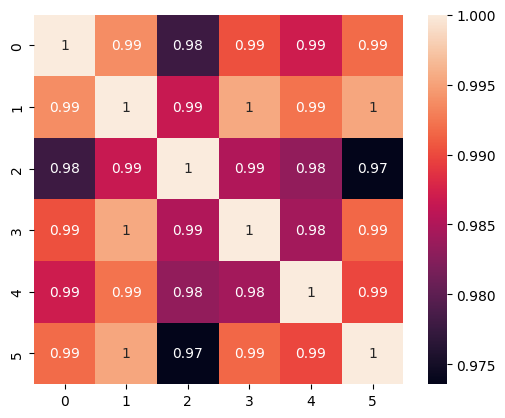

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

similarity = cosine_similarity(countryValues)

mask = np.zeros_like(similarity)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(similarity, square=True, annot=True)
plt.show()


In [14]:

from tqdm import tqdm
from bs4 import BeautifulSoup
import requests

session = requests.Session()
tqdm.pandas()

In [15]:
#expanding URLs
def expandUrls(tweet):
	urls = re.findall(r'(https?://\S+)', tweet)
	expanded = []
	for url in urls:
		try:
			expanded.append(session.head(url, allow_redirects=True, timeout=3).url)
		except:
			expanded.append(url)
	return expanded

In [16]:
expandUrls(training_df['text'][235000])

['https://paper.li/JacobTh85649736/1584426982?edition_id=5fe8a2a0-c40a-11ea-a3f9-0cc47a0d1605']

In [17]:
#expanded_urls = []                   
#for i in tqdm(range(len(training_df))):
	#expanded_urls.append(expandUrls(training_df['text'][i]))
#training_df['expanded_urls'] = expanded_urls

In [18]:
training_df['text_remove_newline'] = training_df['all_english_text'].apply(lambda x: x.replace("\n", ""))
training_df['text_demojize'] = training_df['text_remove_newline'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))
training_df['remove_links'] = training_df['text_demojize'].apply(lambda x: re.sub(r'https?://\S+', ' ', x)) 
training_df['cleaned_text'] = training_df['remove_links'].apply(lambda x: re.sub(r' +', ' ', x))


In [19]:
training_df

,Unnamed: 0,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,all_english_text,expanded_urls,text_remove_newline,text_demojize,remove_links,cleaned_text
0,0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,False,True,WuhanCoronaVirus KillerCuomo,us,Remember the #WuhanCoronaVirus? The pandemic w...,,Remember the #WuhanCoronaVirus? The pandemic w...,Remember the #WuhanCoronaVirus? The pandemic w...,Remember the #WuhanCoronaVirus? The pandemic w...,Remember the #WuhanCoronaVirus? The pandemic w...
1,1,My sources @WhiteHouse say 2 tactics will be u...,NaN,False,True,Trump,us,My sources @WhiteHouse say 2 tactics will be u...,,My sources @WhiteHouse say 2 tactics will be u...,My sources @WhiteHouse say 2 tactics will be u...,My sources @WhiteHouse say 2 tactics will be u...,My sources @WhiteHouse say 2 tactics will be u...
2,2,I'll venture a wild guess: If you were running...,NaN,False,True,COVID19,us,I'll venture a wild guess: If you were running...,https://www.science.org/content/article/new-wh...,I'll venture a wild guess: If you were running...,I'll venture a wild guess: If you were running...,I'll venture a wild guess: If you were running...,I'll venture a wild guess: If you were running...
3,3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,False,True,Pakistan GreenStimulus Nature Green,us,#Pakistan (#GreenStimulus = #Nature protection...,https://news.trust.org/item/20200717070925-r4m9m/,#Pakistan (#GreenStimulus = #Nature protection...,#Pakistan (#GreenStimulus = #Nature protection...,#Pakistan (#GreenStimulus = #Nature protection...,#Pakistan (#GreenStimulus = #Nature protection...
4,4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,False,True,coronavirus COVID__19 COVIDー19,us,🇺🇸 Pandemic of #Coronavirus: 30 American pasto...,,🇺🇸 Pandemic of #Coronavirus: 30 American pasto...,United_States Pandemic of #Coronavirus: 30 A...,United_States Pandemic of #Coronavirus: 30 A...,United_States Pandemic of #Coronavirus: 30 Am...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,239995,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN,True,True,Mastеr,new_zealand,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",,"Aa Likes, Retweets yentra 🙏🔥🔥🔥#Mastеr","Aa Likes, Retweets yentra folded_hands fire ...","Aa Likes, Retweets yentra folded_hands fire ...","Aa Likes, Retweets yentra folded_hands fire fi..."
239996,239996,Very interesting\nAny thoughts?\n\n#TheFive #T...,NaN,False,True,TheFive Trump2020 KAG2020 mondaythoughts COVID...,new_zealand,Very interesting\nAny thoughts?\n\n#TheFive #T...,https://twitter.com/Franck2Ausa/status/1287847...,Very interestingAny thoughts?#TheFive #Trump20...,Very interestingAny thoughts?#TheFive #Trump20...,Very interestingAny thoughts?#TheFive #Trump20...,Very interestingAny thoughts?#TheFive #Trump20...
239997,239997,As we deal with #COVID19 don't forget that #Ch...,NaN,True,True,COVID19 Christians persecution Nigeria,new_zealand,As we deal with #COVID19 don't forget that #Ch...,https://twitter.com/psjuk_official/status/1253...,As we deal with #COVID19 don't forget that #Ch...,As we deal with #COVID19 don't forget that #Ch...,As we deal with #COVID19 don't forget that #Ch...,As we deal with #COVID19 don't forget that #Ch...
239998,239998,"While we hit 150,000 in #COVID19 deaths, the P...",NaN,False,True,COVID19,new_zealand,"While we hit 150,000 in #COVID19 deaths, the P...",,"While we hit 150,000 in #COVID19 deaths, the P...","While we hit 150,000 in #COVID19 deaths, the P...","While we hit 150,000 in #COVID19 deaths, the P...","While we hit 150,000 in #COVID19 deaths, the P..."


In [20]:
from urllib.parse import urlparse

def getUrlWords(urls):
    info = []
    urls = urls.split(" ")
    if(urls != ['']):
        for url in urls:
            parsed_url = urlparse(url)
            split_slash = " ".join(parsed_url.path.split("/"))
            info.append(" ".join(split_slash.split('-')))
            
            if (parsed_url.netloc not in ['twitter.com', 't.co']):
                info.append(parsed_url.netloc)

    return " ".join(info)

In [21]:
training_df['url_info'] = training_df['expanded_urls'].apply(lambda x: getUrlWords(x))


In [22]:
training_df['final_text'] = training_df['all_english_text'] + training_df['url_info']


In [23]:
for i in range(25):
    print(training_df['final_text'][i])
    print()

Remember the #WuhanCoronaVirus? The pandemic where a great percentage of the deaths resulted from #KillerCuomo’s nursing home slaughter? The one where we were quarantined by Democrats? It’ll be back, rest assured, as soon as the riots stop. Anything to destroy Trump.

My sources @WhiteHouse say 2 tactics will be used to get America open &amp; #Trump reelected.
1.) Cast doubts on all #COVID19 death numbers &amp; try to get Americans to disbelieve their health depts. &amp; @CDCgov rpts.
and
2.) Use Exec Order powers to "create demand" for...
MORE

I'll venture a wild guess: If you were running the USA in a #COVID19 crisis you'd want our scientists working full bore, &amp; find $ to keep labs working.
Yeah, well, labs all over USA are running out of time &amp; money &amp; #Trump admin is shrugging its shoulders.
https://t.co/aG1ZYgeHuI content article new white house rules restrict use grant funding deal covid 19 impacts www.science.org

#Pakistan (#GreenStimulus = #Nature protection + #G

In [24]:
X = training_df['final_text']
y = training_df['country']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [26]:

from nltk.corpus import stopwords

In [27]:
from sklearn.naive_bayes import MultinomialNB

nb_pipeline = Pipeline([
  ("tf-idf", TfidfVectorizer(sublinear_tf = True, 
  						stop_words = 'english'
							)),
  ("nb", MultinomialNB())
])
nb_pipeline.fit(X_train, y_train)

y_pred = nb_pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.4794583333333333


In [28]:
from sklearn.svm import LinearSVC

svc_pipeline = Pipeline([
 ("tf-idf", TfidfVectorizer(sublinear_tf = True, 
  							stop_words = 'english'
							)),
  ("svc", LinearSVC())
])
svc_pipeline.fit(X=X_train, y=y_train)
y_pred = svc_pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))

KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("lr", LogisticRegression(max_iter = 250))
])
lr_pipeline.fit(X_train, y_train)

y_pred = lr_pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
test_df = pd.read_csv("/home/tdurkin/Desktop/test_data_new.csv")
test_df.head()

In [ ]:
test_df['text_remove_newline'] = test_df['all_english_text'].apply(lambda x: x.replace("\n", ""))
test_df['text_demojize'] = test_df['text_remove_newline'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))
test_df['remove_links'] = test_df['text_demojize'].apply(lambda x: re.sub(r'http\S+', ' ', x)) 
test_df['cleaned_text'] = test_df['remove_links'].apply(lambda x: re.sub(r' +', ' ', x))
test_df['url_info'] = test_df['expanded_urls'].apply(lambda x: getUrlWords(x))
test_df['final_text'] = test_df['cleaned_text'] + test_df['url_info']


In [ ]:
test_y_pred = nb_pipeline.predict(test_df['final_text'])
test_y_pred

In [ ]:
submission = pd.DataFrame()
submission["Id"] = test_df["Id"]
submission["Category"] = test_y_pred
submission.head()

In [ ]:
submission.to_csv("/home/tdurkin/Desktop/submission.csv", index=False)